### 1. Implement the program and explain the results.

(a)Use forward Euler method to solve the following problem
\begin{equation*}
y' = -5y 
\quad y(0) = 1
\end{equation*}
Solve the problem for $t \in [0, 10]$ with $h = 0.4$, $h = 0.41$ and $h = 0.1$.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
def march_explicit(f, y0, T, h):
    t = [0.0]
    y = [float(y0)]
    tn, yn = 0.0, float(y0)
    while tn < T - 1e-12:
        hstep = min(h, T - tn)
        yn = yn + hstep * f(tn, yn)
        tn = tn + hstep
        t.append(tn); y.append(yn)
    return np.array(t), np.array(y)

def forward_euler_linear(lmbd, y0, T, h):
    return march_explicit(lambda t, y: lmbd * y, y0, T, h)

def backward_euler_linear(lmbd, y0, T, h):
    t = [0.0]
    y = [float(y0)]
    tn, yn = 0.0, float(y0)
    while tn < T - 1e-12:
        hstep = min(h, T - tn)
        factor = 1.0 / (1.0 - hstep * lmbd)
        yn = yn * factor
        tn = tn + hstep
        t.append(tn); y.append(yn)
    return np.array(t), np.array(y)

def exact_neg5(t):
    return np.exp(-5.0 * np.asarray(t))

def exact_pos5(t):
    return np.exp( 5.0 * np.asarray(t))

In [11]:
T = 10.0
h_values = [0.4, 0.41, 0.1]
t_dense = np.linspace(0, T, 800)

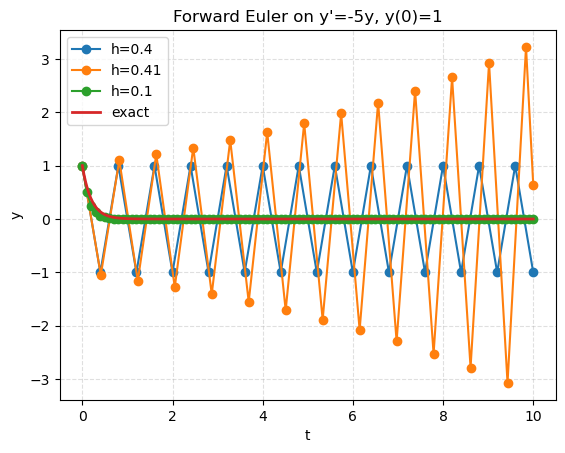

,method,h,steps,y(T) numeric,y(T) exact,abs error,per-step multiplier
2,Forward Euler (λ=-5),0.10,100,7.888609e-31,1.928750e-22,1.928750e-22,0.50
0,Forward Euler (λ=-5),0.40,25,-1.000000e+00,1.928750e-22,1.000000e+00,-1.00
1,Forward Euler (λ=-5),0.41,25,6.450200e-01,1.928750e-22,6.450200e-01,-1.05


In [13]:
results_forward = {}
for h in h_values:
    t, y = forward_euler_linear(-5.0, 1.0, T, h)
    results_forward[h] = (t, y)

plt.figure()
for h,(t,y) in results_forward.items():
    plt.plot(t, y, marker='o', linestyle='-', label=f'h={h}')
plt.plot(t_dense, exact_neg5(t_dense), linewidth=2, label='exact')
plt.xlabel('t'); plt.ylabel('y'); plt.legend()
plt.title("Forward Euler on y'=-5y, y(0)=1")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

rows = []
yT_exact = float(exact_neg5(T))
for h,(t,y) in results_forward.items():
    rows.append({
        "method": "Forward Euler (λ=-5)",
        "h": h,
        "steps": len(t)-1,
        "y(T) numeric": y[-1],
        "y(T) exact": yT_exact,
        "abs error": abs(y[-1]-yT_exact),
        "per-step multiplier": 1 - 5*h
    })
df_forward = pd.DataFrame(rows).sort_values("h")
df_forward

(b)Use backward Euler method to solve the following problem
\begin{equation*}
y' = 5y 
\quad y(0) = 1
\end{equation*}
Solve the problem for $t \in [0, 10]$ with $h = 0.4$, $h = 0.41$ and $h = 0.1$.


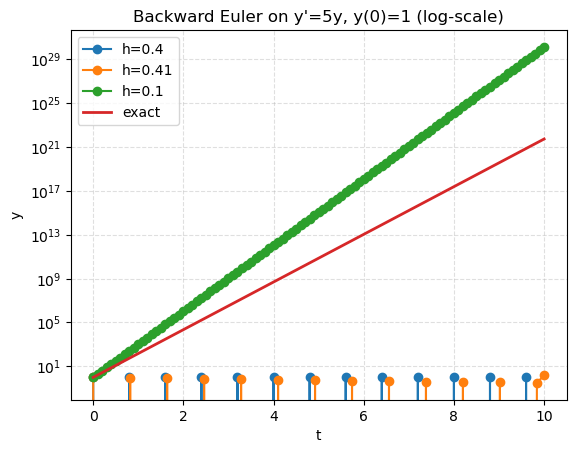

,method,h,steps,y(T) numeric,y(T) exact,abs error,per-step multiplier
2,Backward Euler (λ=+5),0.10,100,1.267651e+30,5.184706e+21,1.267651e+30,2.000000
0,Backward Euler (λ=+5),0.40,25,-1.000000e+00,5.184706e+21,5.184706e+21,-1.000000
1,Backward Euler (λ=+5),0.41,25,1.550340e+00,5.184706e+21,5.184706e+21,-0.952381


In [16]:
results_backward = {}
for h in h_values:
    t, y = backward_euler_linear(5.0, 1.0, T, h)
    results_backward[h] = (t, y)

plt.figure()
for h,(t,y) in results_backward.items():
    plt.plot(t, y, marker='o', linestyle='-', label=f'h={h}')
plt.plot(t_dense, exact_pos5(t_dense), linewidth=2, label='exact')
plt.yscale('log') 
plt.xlabel('t'); plt.ylabel('y'); plt.legend()
plt.title("Backward Euler on y'=5y, y(0)=1 (log-scale)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

rows = []
yT_exact = float(exact_pos5(T))
for h,(t,y) in results_backward.items():
    rows.append({
        "method": "Backward Euler (λ=+5)",
        "h": h,
        "steps": len(t)-1,
        "y(T) numeric": y[-1],
        "y(T) exact": yT_exact,
        "abs error": abs(y[-1]-yT_exact),
        "per-step multiplier": 1.0/(1.0 - 5*h)
    })
df_backward = pd.DataFrame(rows).sort_values("h")
df_backward

### 2.Consider solving the following problem using the Forward Euler method:
### \begin{equation*}
y' = y(1-y), 
\quad y(0) = y_0,
\quad 0 < y_0 < 1.
\end{equation*}
### Find the range of $h$ such that the solution is qualitatively correct.

Numerically derived upper bound for h ≈ 1.0000


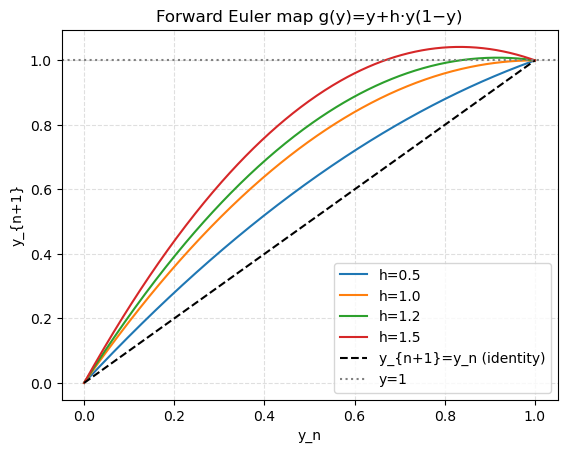

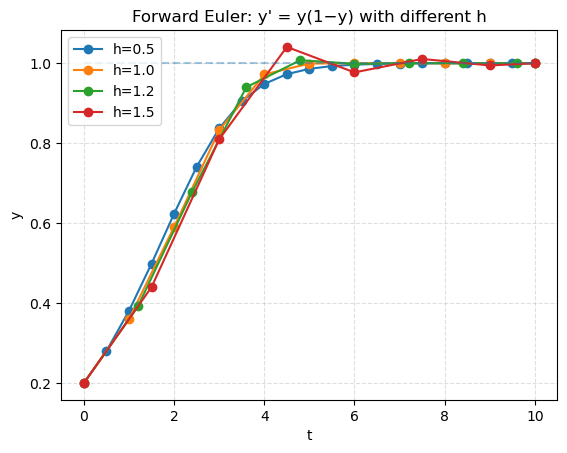

In [20]:
def g(y, h):
    return y + h*y*(1 - y)

def find_h_max(num_points=10000):
    y_vals = np.linspace(1e-6, 1-1e-6, num_points)
    h_bounds = (1 - y_vals) / (y_vals * (1 - y_vals))
    h_max = np.min(h_bounds)
    return h_max

def check_monotonic(h):
    y = np.linspace(0, 1, 1001)
    diff = g(y, h) - y
    return np.all(diff >= -1e-12)

if __name__ == "__main__":

    h_max = find_h_max()
    print(f"Numerically derived upper bound for h ≈ {h_max:.4f}")
    
    y = np.linspace(0, 1, 400)
    plt.figure()
    for h in [0.5, 1.0, 1.2, 1.5]:
        plt.plot(y, g(y, h), label=f"h={h}")
    plt.plot(y, y, 'k--', label="y_{n+1}=y_n (identity)")
    plt.axhline(1, color='gray', linestyle=':', label="y=1")
    plt.xlabel("y_n"); plt.ylabel("y_{n+1}")
    plt.title("Forward Euler map g(y)=y+h·y(1−y)")
    plt.legend(); plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()

    def euler_logistic(y0, h, T=10):
        f = lambda y: y*(1-y)
        t=[0.0]; ylist=[y0]
        tn, yn=0.0, y0
        while tn < T - 1e-12:
            hstep=min(h, T-tn)
            yn=yn + hstep*f(yn)
            tn+=hstep
            t.append(tn); ylist.append(yn)
        return np.array(t), np.array(ylist)

    plt.figure()
    for h in [0.5, 1.0, 1.2, 1.5]:
        t, y = euler_logistic(0.2, h)
        plt.plot(t, y, marker='o', label=f"h={h}")
    plt.hlines(1, 0, 10, linestyles='--', alpha=0.4)
    plt.xlabel("t"); plt.ylabel("y")
    plt.title("Forward Euler: y' = y(1−y) with different h")
    plt.legend(); plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()